# Analyzing Portfolio Risk and Return

In this Challenge, you'll assume the role of a quantitative analyst for a FinTech investing platform. This platform aims to offer clients a one-stop online investment solution for their retirement portfolios that’s both inexpensive and high quality. (Think about [Wealthfront](https://www.wealthfront.com/) or [Betterment](https://www.betterment.com/)). To keep the costs low, the firm uses algorithms to build each client's portfolio. The algorithms choose from various investment styles and options.

You've been tasked with evaluating four new investment options for inclusion in the client portfolios. Legendary fund and hedge-fund managers run all four selections. (People sometimes refer to these managers as **whales**, because of the large amount of money that they manage). You’ll need to determine the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.

## Instructions

### Import the Data

Use the ``risk_return_analysis.ipynb`` file to complete the following steps:

1. Import the required libraries and dependencies.

2. Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

3. Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

### Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents. To do so, complete the following steps:

1. Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

3. Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots. To do so, complete the following steps:

1. Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

    > **Hint** Save this new DataFrame&mdash;the one that contains the data for just the four fund portfolios. You’ll use it throughout the analysis.

3. Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta. To do so, complete the following steps:

1. Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

2. Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

3. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

5. Answer the following three questions:

* Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

* Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

* Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio. To do so, complete the following steps:

1. Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

2. Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

3. Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

#### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options. To start your analysis, complete the following step:

* Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

Next, for each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

Finally, answer the following two questions:

* Which of the two portfolios seem more sensitive to movements in the S&P 500?

* Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?


### Import the Data

#### Step 1: Import the required libraries and dependencies.

In [1]:
# Importing the required libraries and dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

%matplotlib inline

#### Step 2: Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Review the first five rows of the DataFrame by using the `head` function.

In [2]:
# Import the data by reading in the CSV file and setting the DatetimeIndex.
whale_navs_df = pd.read_csv(Path("./Resources/whale_navs.csv"),
                           index_col = "date",
                           parse_dates = True,
                           infer_datetime_format = True)

# Reviewing the first 5 rows of the DataFrame.
display(whale_navs_df.head())

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Step 3: Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Base this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

In [3]:
# Converting the dataframe of NAVs and prices to daily returns.
# Dropping any rows with all missing values.
daily_returns_navs_df = whale_navs_df.pct_change().dropna()

# Reviewing the first five rows of the daily returns DataFrame.
display(daily_returns_navs_df.head())


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification. You’ll analyze each component one at a time.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'BERKSHIRE HATHAWAY INC - Daily Returns'}, xlabel='date'>

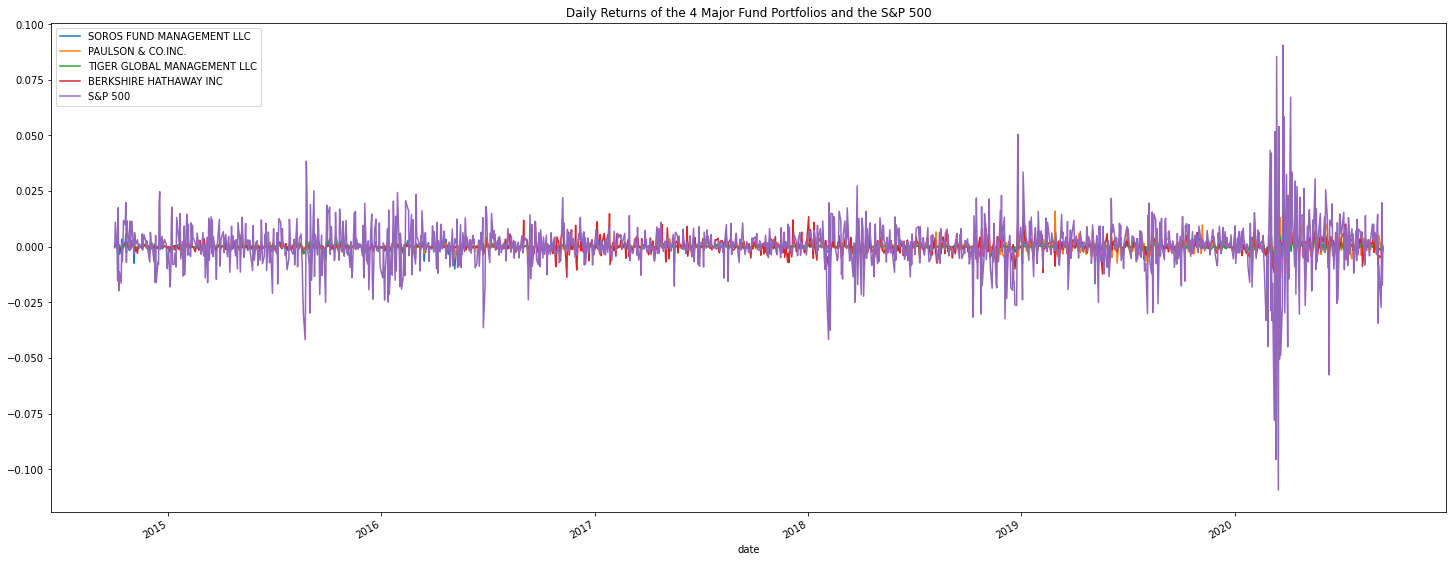

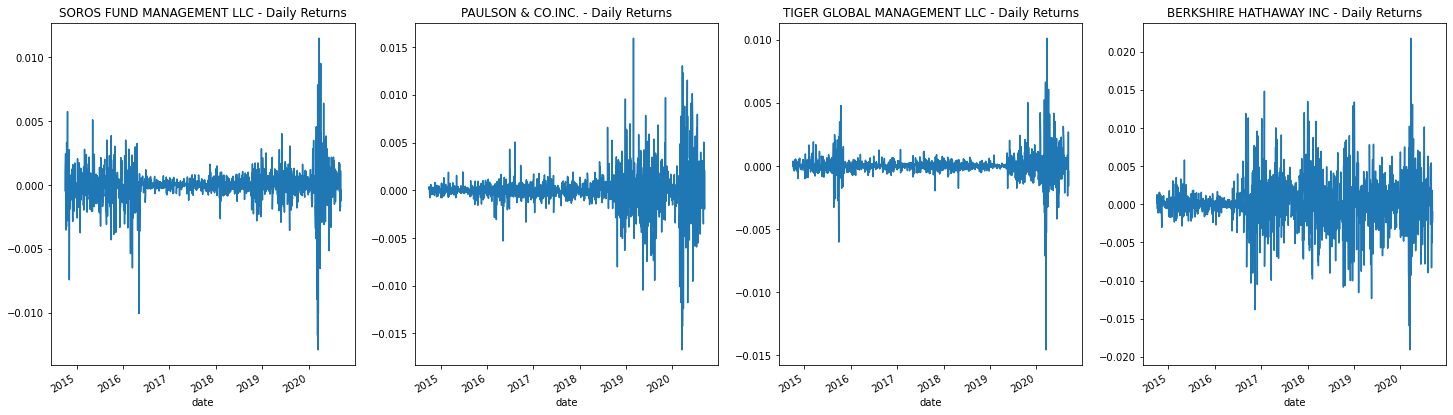

In [4]:
# Plot of the daily return data of the 4 funds and the S&P 500.
ax = daily_returns_navs_df["SOROS FUND MANAGEMENT LLC"].plot(figsize = (25,10), title = "Daily Returns of the 4 Major Fund Portfolios and the S&P 500")

daily_returns_navs_df["PAULSON & CO.INC."].plot(ax=ax)
daily_returns_navs_df["TIGER GLOBAL MANAGEMENT LLC"].plot(ax=ax)
daily_returns_navs_df["BERKSHIRE HATHAWAY INC"].plot(ax=ax)
daily_returns_navs_df["S&P 500"].plot(ax=ax)

ax.legend(["SOROS FUND MANAGEMENT LLC","PAULSON & CO.INC.","TIGER GLOBAL MANAGEMENT LLC","BERKSHIRE HATHAWAY INC", "S&P 500"])

# Added a second row of graph to vizualise the 4 funds individualy.
fig, axis = plt.subplots(1,4, figsize = (25,7))
daily_returns_navs_df["SOROS FUND MANAGEMENT LLC"].plot(ax=axis[0], title = "SOROS FUND MANAGEMENT LLC - Daily Returns")
daily_returns_navs_df["PAULSON & CO.INC."].plot(ax=axis[1], title = "PAULSON & CO.INC. - Daily Returns")
daily_returns_navs_df["TIGER GLOBAL MANAGEMENT LLC"].plot(ax=axis[2], title = "TIGER GLOBAL MANAGEMENT LLC - Daily Returns")
daily_returns_navs_df["BERKSHIRE HATHAWAY INC"].plot(ax=axis[3], title = "BERKSHIRE HATHAWAY INC - Daily Returns")


#### Step 2: Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [5]:
# Using the cumprod function to return the cumulative returns of the 4 fund portfolios and the S&P 500.
cumulative_returns = (1 + daily_returns_navs_df).cumprod()

# Display the first and last 5 rows of the cumulative returns DataFrame.
display(cumulative_returns.head())
display(cumulative_returns.tail())

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,0.999558,1.000150,1.000013,1.000171,1.000154
2014-10-03,1.000609,1.000518,1.000407,1.001420,1.011165
2014-10-06,1.003066,1.000510,1.000474,1.001688,1.009982
2014-10-07,1.000437,1.000193,1.000265,1.001100,0.994392
2014-10-08,1.000828,1.000563,1.000507,1.001943,1.011783


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

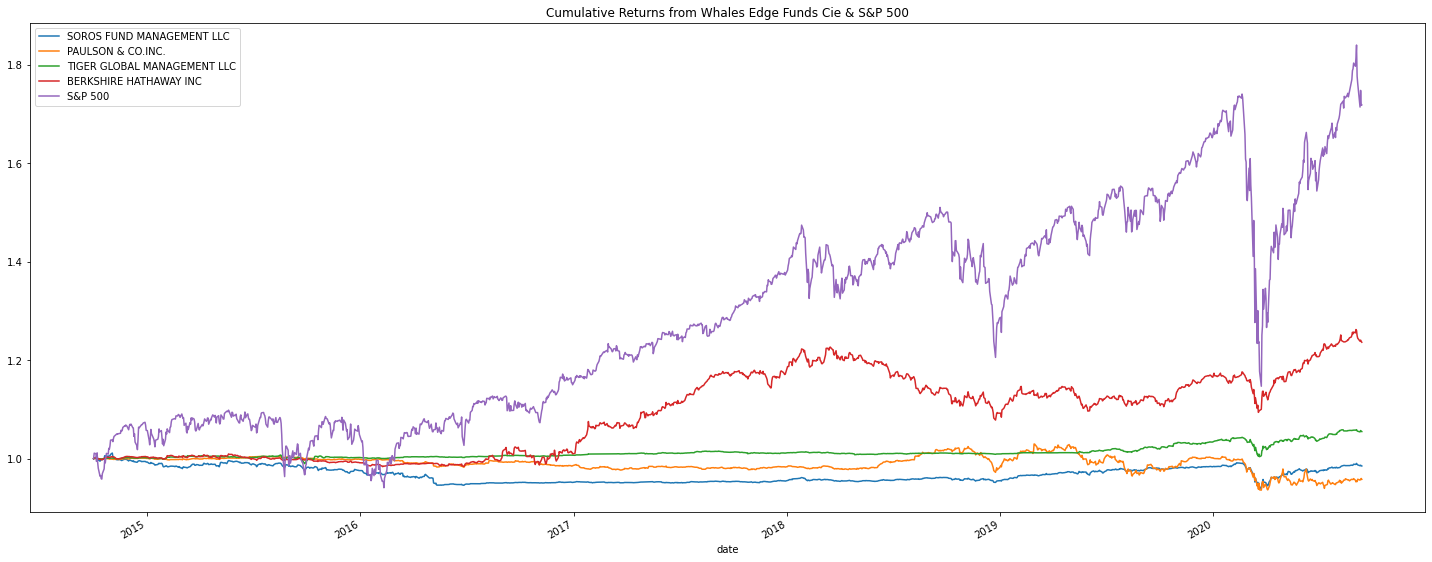

In [6]:
# Visualize the cumulative returns using the Pandas plot function.
ax = cumulative_returns["SOROS FUND MANAGEMENT LLC"].plot(figsize = (25,10), title = "Cumulative Returns from Whales Edge Funds Cie & S&P 500")

cumulative_returns["PAULSON & CO.INC."].plot(ax=ax)
cumulative_returns["TIGER GLOBAL MANAGEMENT LLC"].plot(ax=ax)
cumulative_returns["BERKSHIRE HATHAWAY INC"].plot(ax=ax)
cumulative_returns["S&P 500"].plot(ax=ax)

ax.legend(["SOROS FUND MANAGEMENT LLC","PAULSON & CO.INC.","TIGER GLOBAL MANAGEMENT LLC","BERKSHIRE HATHAWAY INC", "S&P 500"])

#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** *According to the dataframe and chart representation none of the fund portfolios outperformed the S&P 500 Index based on the cumulative return data.*

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily Return Volatility between 4 Major funds and the S&P 500'}>

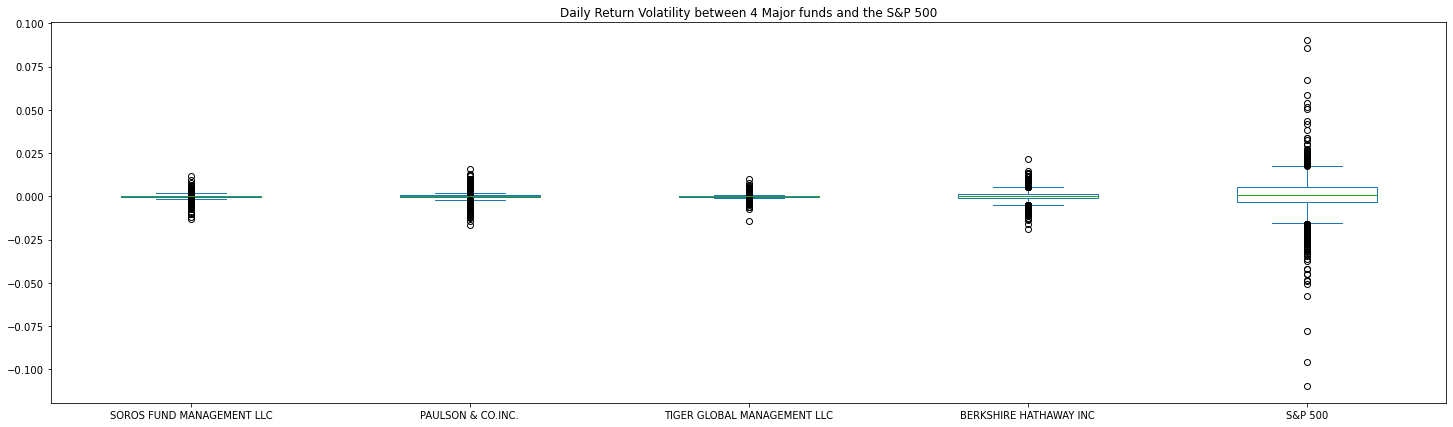

In [7]:
# Box plots to visualize the volatility of the 4 funds and the S&P 500.
daily_returns_navs_df.plot(kind="box", figsize = (25,7), title = "Daily Return Volatility between 4 Major funds and the S&P 500")

#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily Return Volatility between 4 Major funds'}>

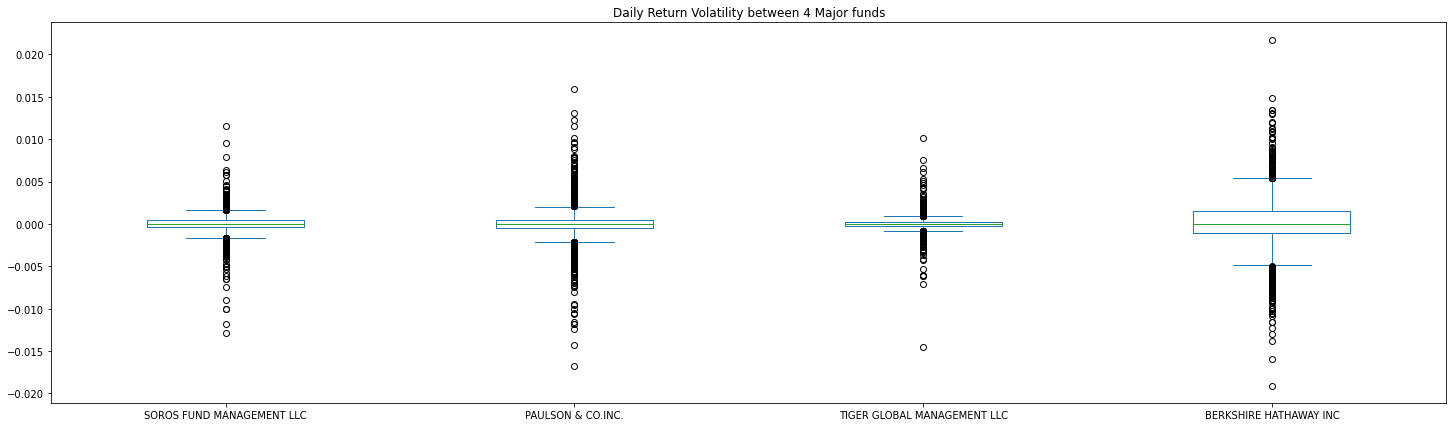

In [8]:
# New DataFrame containing only the 4 fund portfolios excluding the S&P 500 column from the DataFrame.
daily_returns_4funds_df = daily_returns_navs_df.drop(columns=["S&P 500"])

# Box plots to reflect the return data for only the 4 fund portfolio remaining.
daily_returns_4funds_df.plot(kind="box", figsize = (25,7), title = "Daily Return Volatility between 4 Major funds")

#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** *Berkshire Hathaway showed the most volatility with the greatest spread especialy since mid-2016 (see graph at "Analyze the Performance - Step.1"). On the other end Tiget Global Management showed the less volatility with the smallest spread (although we can see an increase in volatility since mid-2019 according to graph at "Analyze the Performance - Step.1")*

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [9]:
# Standard deviation for all 4 portfolios and the S&P 500 sorted smallest to largest.
display(daily_returns_navs_df.std().sort_values())

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [10]:
# Annualized standard deviation based on 252 trading days for the 4 portfolios and the S&P 500.
annualized_std_dev = daily_returns_navs_df.std() * np.sqrt(252)

# Display of the annual standard deviations sorted from smallest to largest.
display(annualized_std_dev.sort_values())

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

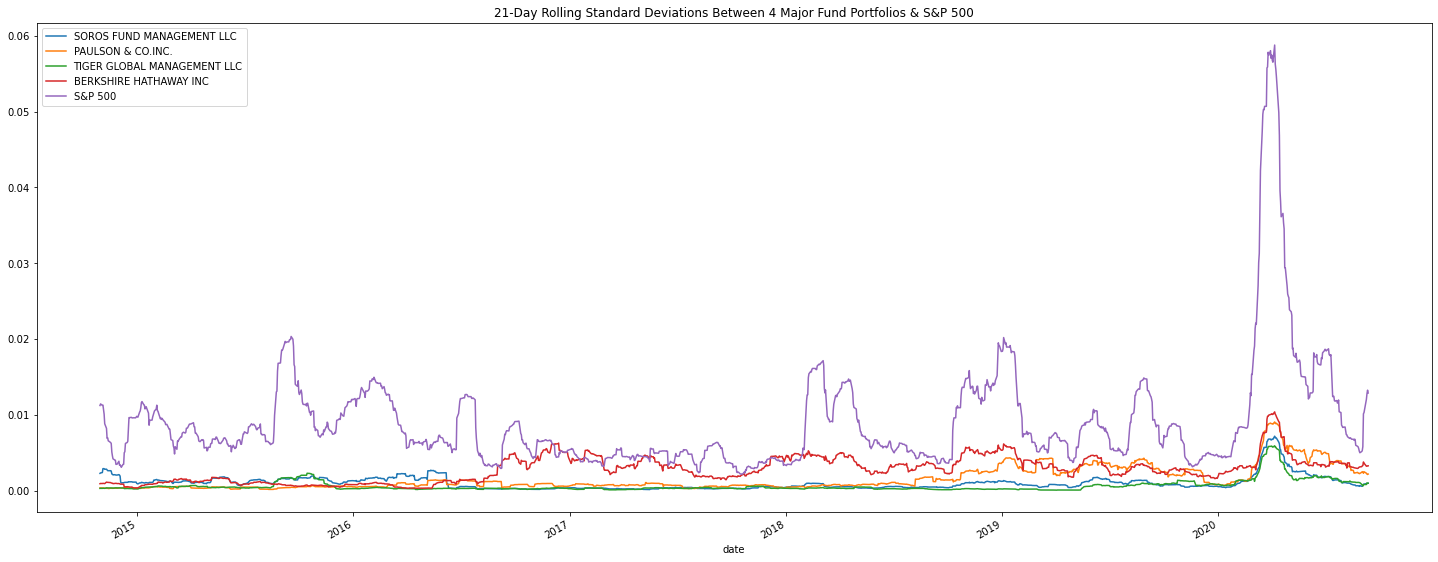

In [11]:
# 21-day rolling standard deviations of the four fund portfolios and of the S&P 500 index.
std_dev_21_days_df = daily_returns_navs_df.rolling(window=21).std()

# Plot of the 21-day rolling standard deviation of the 4 portfolios and the S&P 500.
ax = std_dev_21_days_df["SOROS FUND MANAGEMENT LLC"].plot(figsize = (25,10), title = "21-Day Rolling Standard Deviations Between 4 Major Fund Portfolios & S&P 500")

std_dev_21_days_df["PAULSON & CO.INC."].plot(ax=ax)
std_dev_21_days_df["TIGER GLOBAL MANAGEMENT LLC"].plot(ax=ax)
std_dev_21_days_df["BERKSHIRE HATHAWAY INC"].plot(ax=ax)
std_dev_21_days_df["S&P 500"].plot(ax=ax)

ax.legend(["SOROS FUND MANAGEMENT LLC","PAULSON & CO.INC.","TIGER GLOBAL MANAGEMENT LLC","BERKSHIRE HATHAWAY INC", "S&P 500"])

#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

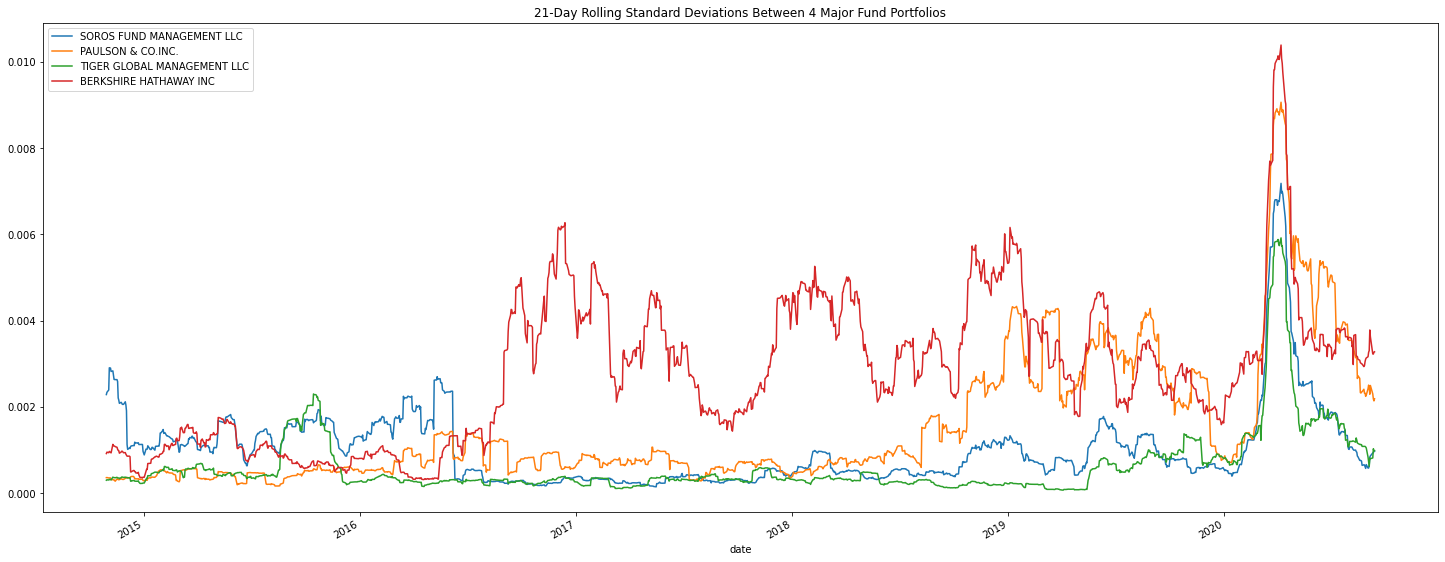

In [12]:
# Plot of the 21-day rolling standard deviation of the 4 portfolios.
ax = std_dev_21_days_df["SOROS FUND MANAGEMENT LLC"].plot(figsize = (25,10), title = "21-Day Rolling Standard Deviations Between 4 Major Fund Portfolios")

std_dev_21_days_df["PAULSON & CO.INC."].plot(ax=ax)
std_dev_21_days_df["TIGER GLOBAL MANAGEMENT LLC"].plot(ax=ax)
std_dev_21_days_df["BERKSHIRE HATHAWAY INC"].plot(ax=ax)

ax.legend(["SOROS FUND MANAGEMENT LLC","PAULSON & CO.INC.","TIGER GLOBAL MANAGEMENT LLC","BERKSHIRE HATHAWAY INC"])


#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** *Based on the annualized standard deviation, none of the four fund portfolios poses more risk that the S&P 500.*

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** *On a much smaller scale of magnitude we can see a tendency for the portfolios to follow the degree of risk of the S&P 500.*


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** *Overall, Berkshire Hathaway showes the most risk. Our finding showes an increase in risk over time from the mid-2016 to mid-2020.*

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [13]:
# Annual average return data for the for fund portfolios and the S&P 500 using 252 trading days in the year.
annual_average_return_df = daily_returns_navs_df.mean() * 252

# Display the annual average returns sorted from lowest to highest.
display(annual_average_return_df.sort_values())

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [14]:
# Annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
annualized_sharpe_ratios = annual_average_return_df / annualized_std_dev

# Display the Sharpe ratios sorted from lowest to highest.
display(annualized_sharpe_ratios.sort_values())

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Sharpe Ratio for the 4 Major Fund Portfolios and the S&P 500'}>

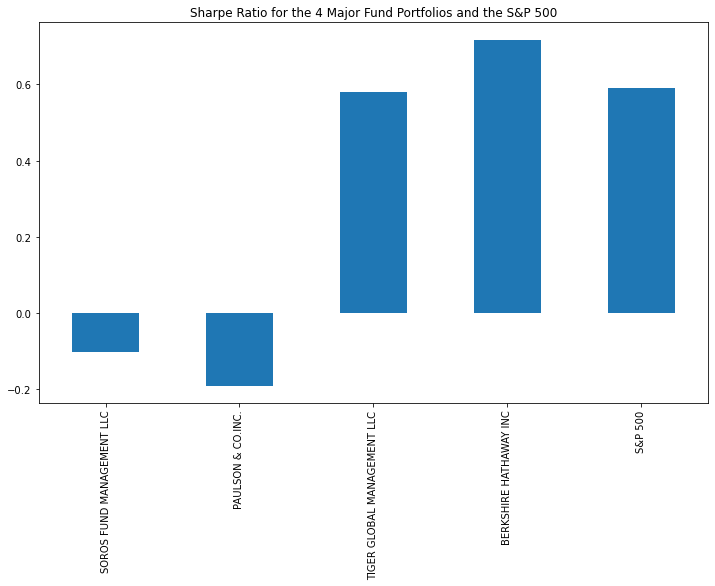

In [15]:
# Bar chart visualization of the Sharpe ratios.
annualized_sharpe_ratios.plot(kind="bar", figsize = (12,7), title = "Sharpe Ratio for the 4 Major Fund Portfolios and the S&P 500")

#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** *Berkshire Hathaway has a highest Sharpe ratio than any of the other portfolios. However, this graph reveals some close competition from Tiger Global Management which also shows less volatility. Paulson & Co offers a worse risk-return profile by quite a bit followed by Soros Fund Management.*

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [16]:
# Variance of the S&P 500 using a rolling 60-day window.
snp_60_days_var = daily_returns_navs_df["S&P 500"].rolling(window=60).var()

# Display the variance of the S&P 500 using a rolling 60-day window.
display(snp_60_days_var.tail())

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [17]:
# Covariance using a 60-day rolling window.
brk_60_days_cov = daily_returns_navs_df["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(daily_returns_navs_df["S&P 500"])

# Display of the last five rows of the covariance data.
display(brk_60_days_cov.tail())

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [18]:
# Beta based on the 60-day rolling covariance compared to the market (S&P 500).
brk_60_days_beta = brk_60_days_cov / snp_60_days_var

# Display of the last five rows of the beta information.
display(brk_60_days_beta.tail())

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [19]:
# Average of the 60-day rolling beta of the portfolio.
print(f"The Berkshire Hathaway 60-day average rolling beta is:{brk_60_days_beta.mean(): .8f}")

The Berkshire Hathaway 60-day average rolling beta is: 0.22149861


##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'60-Day Rolling Beta for Berkshire Hathaway'}, xlabel='date'>

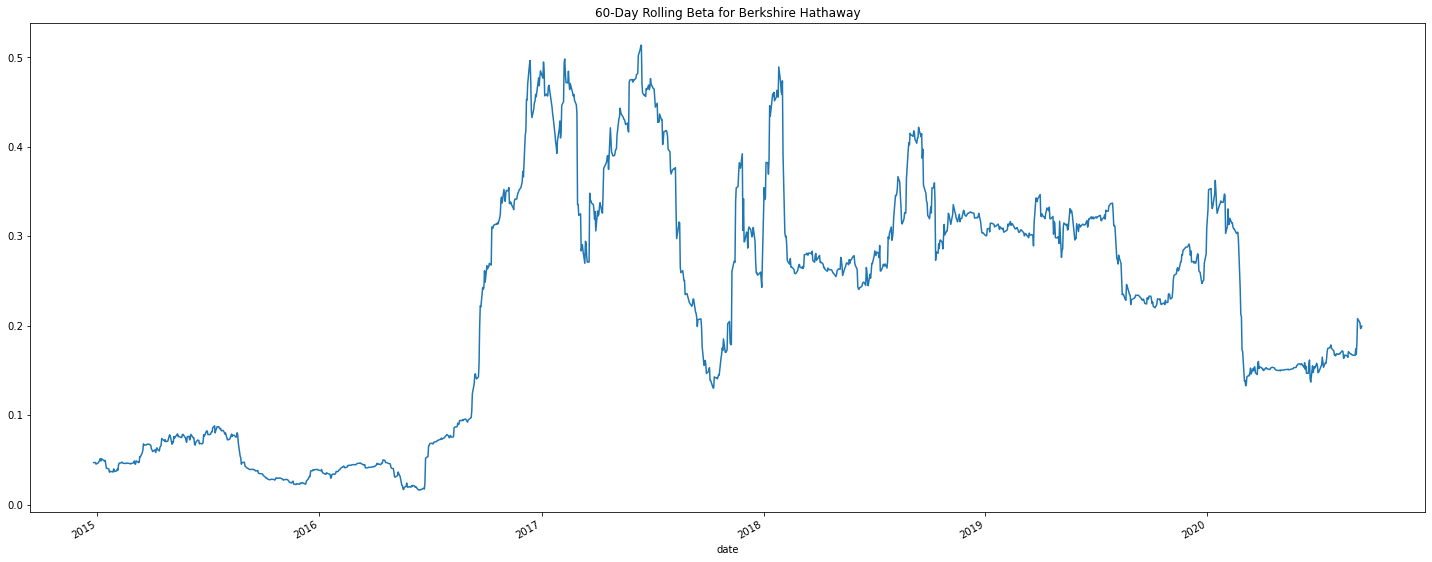

In [20]:
# Plot of the portfolio 60-day rolling beta.
brk_60_days_beta.plot(figsize = (25,10), title = "60-Day Rolling Beta for Berkshire Hathaway")

##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [21]:
# Covariance using a 60-day rolling window.
tgm_60_days_cov = daily_returns_navs_df["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(daily_returns_navs_df["S&P 500"])

# Display of the last five rows of the covariance data.
display(tgm_60_days_cov.tail())

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [22]:
# Beta based on the 60-day rolling covariance compared to the market (S&P 500).
tgm_60_days_beta = tgm_60_days_cov / snp_60_days_var

# Display of the last five rows of the beta portfolio.
display(tgm_60_days_beta.tail())

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [23]:
# Average of the 60-day rolling beta.
print(f"The Tiger Global Management 60-day average rolling beta is:{tgm_60_days_beta.mean(): .8f}")

The Tiger Global Management 60-day average rolling beta is: 0.03093001


##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'60-Day Rolling Beta for Tiger Global Management'}, xlabel='date'>

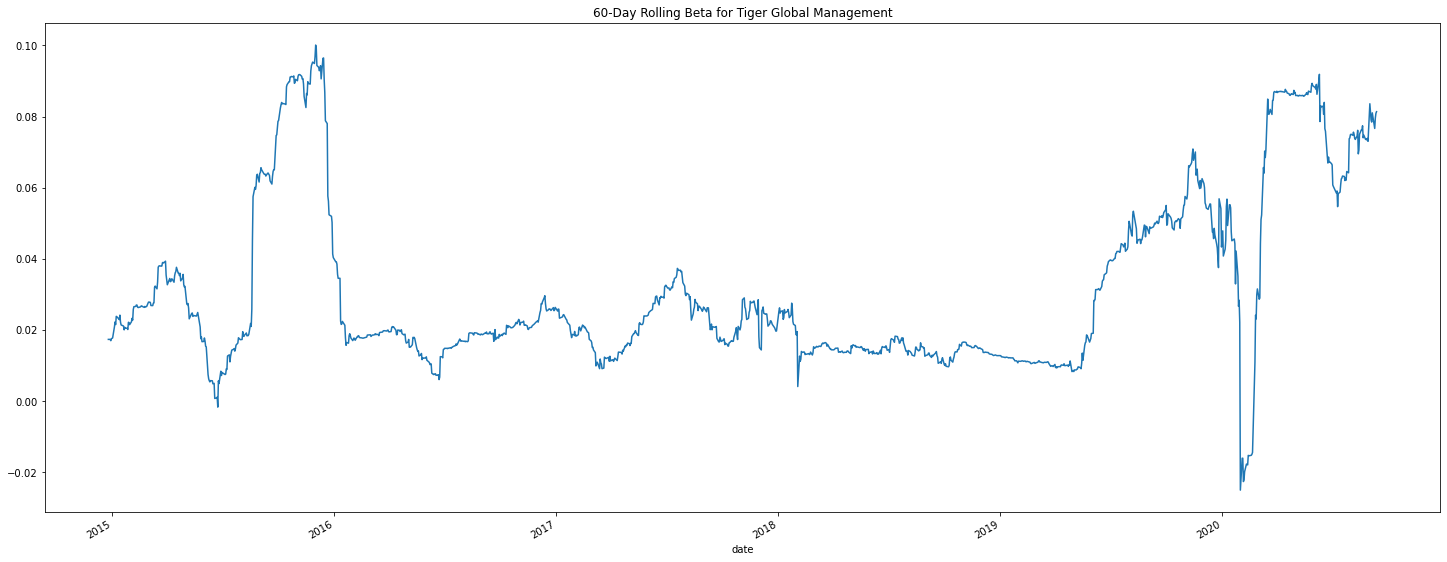

In [24]:
# Plot of the portfolio 60-day rolling beta.
tgm_60_days_beta.plot(figsize = (25,10), title = "60-Day Rolling Beta for Tiger Global Management")

#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** *Overall, Berkshire Hathaway seem more sensitive to movements in the S&P 500. But interestingly we see a inverse behavior (almost an inverse mirror) between these two funds in the early period (2015) of this dataframe and in the later period (2020).*


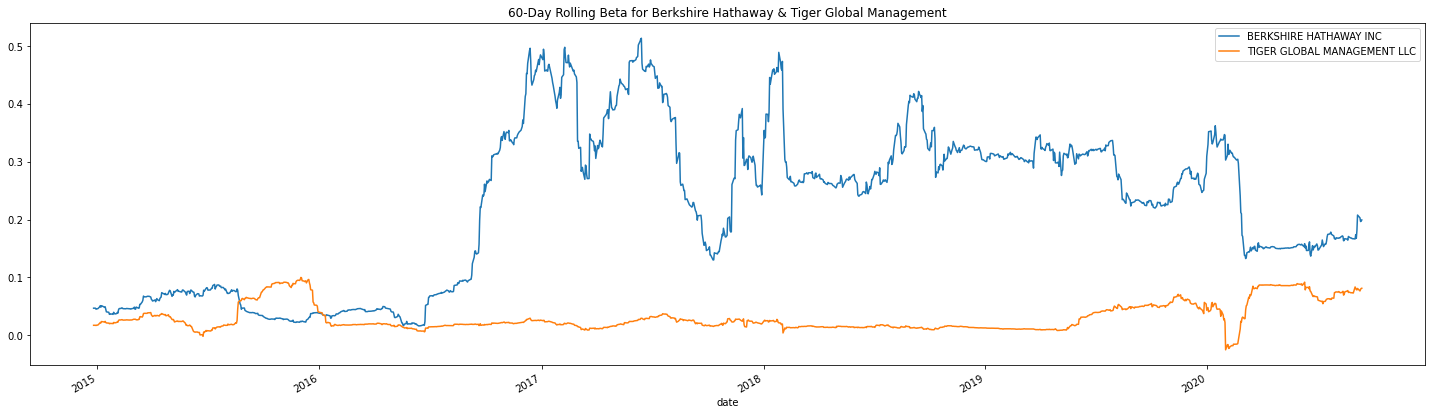

In [25]:
# Plot overlay of both portfolio 60-day rolling beta.
ax = brk_60_days_beta.plot(figsize = (25,7), title = "60-Day Rolling Beta for Berkshire Hathaway & Tiger Global Management")

tgm_60_days_beta.plot(ax=ax)

ax.legend(["BERKSHIRE HATHAWAY INC","TIGER GLOBAL MANAGEMENT LLC"])

**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** # *Although it displays a lower sharpe ratio then Berkshire Hathaway, I would recommand including Tiger Global Management to our firm suite of fund offering. This recommandation is based on considereration of a lower volatility even if the overall cummulative returns combined with a good standing sharpe ratio are second to Berkshire Hathaway.*

---